In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from aqua.diagnostics.teleconnections import ENSO, PlotENSO

/LUMI_TYKKY_L60Yfbf/miniconda/envs/env1/lib/python3.12/site-packages/esmpy/interface/loadESMF.py:94: VersionWarning: ESMF installation version 8.8.0, ESMPy version 8.8.0b0
  warnings.warn("ESMF installation version {}, ESMPy version {}".format(


## Generate the data

We need to initialize a class for each dataset that we want to analyze. This include also the observational dataset that we want to include in the comparison.
Here we set a minimal example for a model and an observational dataset.

In [3]:
dataset_dict = {
    'catalog': 'climatedt-phase1',
    'model': 'IFS-NEMO',
    'exp': 'historical-1990',
    'source': 'lra-r100-monthly',
}
obs_dict = {
    'catalog': 'obs',
    'model': 'ERA5',
    'exp': 'era5',
    'source': 'monthly',
}
common_dict = {
    'loglevel': 'INFO'
}

The classes are initialized:

In [4]:
enso_dataset = ENSO(**dataset_dict, **common_dict)
enso_obs = ENSO(**obs_dict, **common_dict)

We first retrieve the necessary data:

In [5]:
enso_dataset.retrieve()
enso_obs.retrieve()

2025-05-14 18:10:19 :: ConfigPath :: INFO     -> IFS-NEMO_historical-1990_lra-r100-monthly triplet found in in climatedt-phase1!
2025-05-14 18:10:19 :: ConfigPath :: WARNING  -> No paths found in the main configuration file {'climatedt-phase1': {'catalog': ['climatedt-e25.1', 'mn5-phase2', 'nextgems4', 'lumi-phase2', 'lumi-phase1', 'climatedt-phase1', 'obs'], 'machine': 'lumi', 'reader': {'catalog': '/users/nurissom/.aqua/catalogs/climatedt-phase1/catalog.yaml', 'machine': '/users/nurissom/.aqua/catalogs/climatedt-phase1/machine.yaml', 'fixer': '/users/nurissom/.aqua/fixes', 'regrid': '/users/nurissom/.aqua/grids'}, 'options': {'style': 'aqua'}}}
2025-05-14 18:10:20 :: Reader :: INFO     -> Convention dictionary: eccodes-2.39.0
2025-05-14 18:10:20 :: Reader :: INFO     -> No fixer_name found, only convention will be applied
2025-05-14 18:10:20 :: Reader :: INFO     -> Grid metadata is lon-lat
2025-05-14 18:10:20 :: Regridder :: WARNING  -> Source grid path not found. Please provide a d

The index can be computed with a single command, which will store the results in the `self.index` attribute of the class.

In [6]:
enso_dataset.compute_index()
enso_obs.compute_index()

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


We can use the generic purpose method `save_netcdf` to save the index.

In [7]:
enso_dataset.save_netcdf(enso_dataset.index, diagnostic='enso', diagnostic_product='index')
enso_obs.save_netcdf(enso_obs.index, diagnostic='enso', diagnostic_product='index')

2025-05-14 18:11:31 :: create_folder :: INFO     -> Folder ./netcdf already exists
2025-05-14 18:11:31 :: OutputSaver :: INFO     -> NetCDF file successfully saved.
2025-05-14 18:11:31 :: create_folder :: INFO     -> Folder ./netcdf already exists
2025-05-14 18:11:31 :: OutputSaver :: INFO     -> NetCDF file successfully saved.


We also evaluate the regression (same can be done for the correlation) and save the results in a netcdf file.
We compute the regression for the same variable as the index and for the annual data, but a season and another variable can be specified as method arguments.

In [8]:
reg_data = enso_dataset.compute_regression()
reg_obs = enso_obs.compute_regression()

enso_dataset.save_netcdf(reg_data, diagnostic='enso', diagnostic_product='regression')
enso_obs.save_netcdf(reg_obs, diagnostic='enso', diagnostic_product='regression')

2025-05-14 18:11:31 :: create_folder :: INFO     -> Folder ./netcdf already exists


2025-05-14 18:11:32 :: OutputSaver :: INFO     -> NetCDF file successfully saved.
2025-05-14 18:11:32 :: create_folder :: INFO     -> Folder ./netcdf already exists
2025-05-14 18:11:32 :: create_folder :: INFO     -> Folder ./netcdf already exists
2025-05-14 18:12:15 :: OutputSaver :: INFO     -> NetCDF file successfully saved.


## Plot the results

We have now everything to plot the results. The PlotENSO class will take care of collecting the metadata from the datasets and plotting the results.

In [9]:
plt = PlotENSO(indexes=enso_dataset.index, ref_indexes=enso_obs.index, loglevel='INFO')

We start with the index plot. The different data are plotted in a single column.

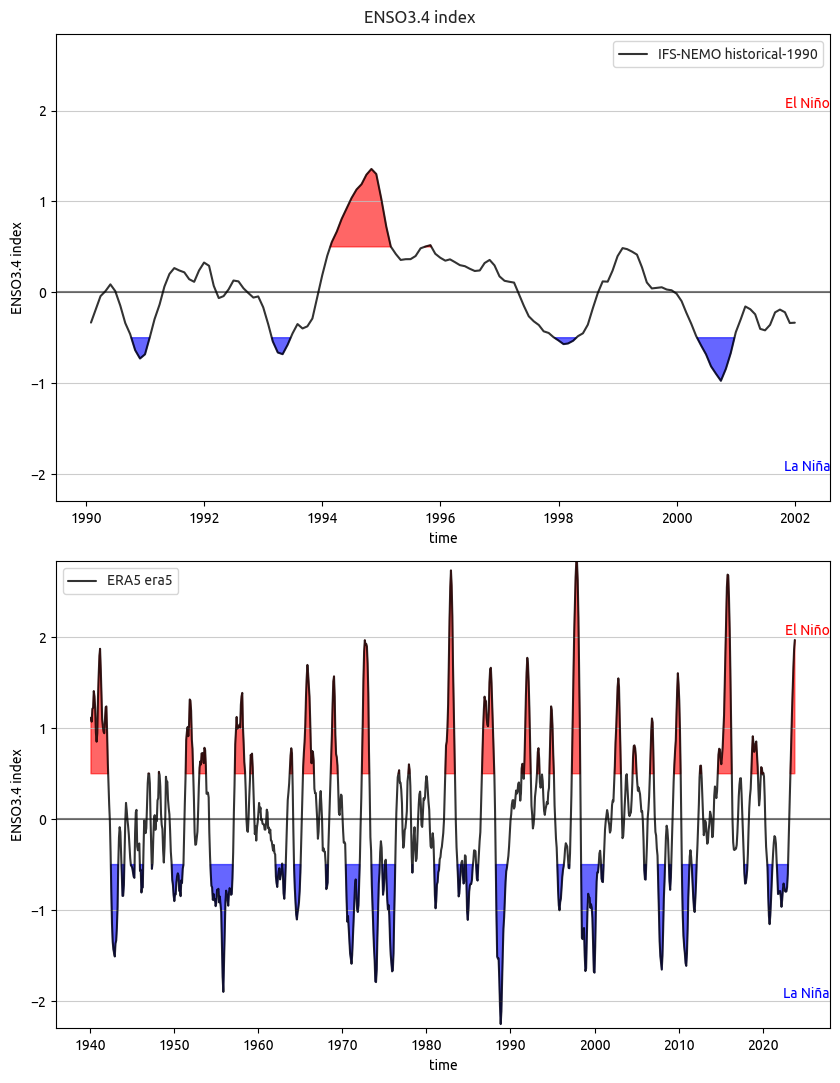

In [10]:
fig_index, _ = plt.plot_index()

We create the caption to be embedded with the metadata of the figure. We save the image as png but pdf is supported as well.

In [11]:
description = plt.set_index_description()
plt.save_plot(fig_index, diagnostic_product='index', metadata={'description': description})

2025-05-14 18:12:18 :: create_folder :: INFO     -> Folder ./png already exists


2025-05-14 18:12:20 :: add_png_metadata :: INFO     -> Metadata added to PNG: ./png/enso.index.climatedt-phase1.IFS-NEMO.historical-1990.obs.ERA5.era5.png
2025-05-14 18:12:20 :: OutputSaver :: INFO     -> Saved PNG: ./png/enso.index.climatedt-phase1.IFS-NEMO.historical-1990.obs.ERA5.era5.png
2025-05-14 18:12:20 :: OutputSaver :: INFO     -> Saved PNG: ./png/enso.index.climatedt-phase1.IFS-NEMO.historical-1990.obs.ERA5.era5.png


In [12]:
reg_data.load()
reg_obs.load()

<xarray.DataArray (lat: 721, lon: 1440)> Size: 8MB
array([[            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       ...,
       [-2.40109697e-05, -2.41957936e-05, -2.41957936e-05, ...,
        -2.65009009e-05, -2.40109697e-05, -2.41957936e-05],
       [-2.40109697e-05, -1.87833712e-05, -1.92609739e-05, ...,
        -2.40109697e-05, -2.40109697e-05, -2.40109697e-05],
       [-2.49132259e-05, -2.49132259e-05, -2.49132259e-05, ...,
        -2.49132259e-05, -2.49132259e-05, -2.49132259e-05]])
Coordinates:
  * lon      (lon) float64 12kB 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * lat      (lat) float64 6kB -90.0 -89.75 -89.5 -89.25 ... 89.5 89.75 90.0
Attributes: (12/20)
    long_name:       Sea surface temperature
    units:           K
    code:            34
    table:           128
    history:         \n2025-05-14 18:10:50 AQUA💧: Variable renamed tos from S...
    paramId:         262101
    ...              ...
    diagnostic:      enso
    model:           ERA5
    experiment:      era5
    time_precision:  ymd
    catalog:         obs
    rebuild:         True

2025-05-14 18:13:08 :: create_folder :: INFO     -> Folder ./png already exists
2025-05-14 18:13:09 :: add_png_metadata :: INFO     -> Metadata added to PNG: ./png/enso.regression.climatedt-phase1.IFS-NEMO.historical-1990.obs.ERA5.era5.png
2025-05-14 18:13:09 :: OutputSaver :: INFO     -> Saved PNG: ./png/enso.regression.climatedt-phase1.IFS-NEMO.historical-1990.obs.ERA5.era5.png


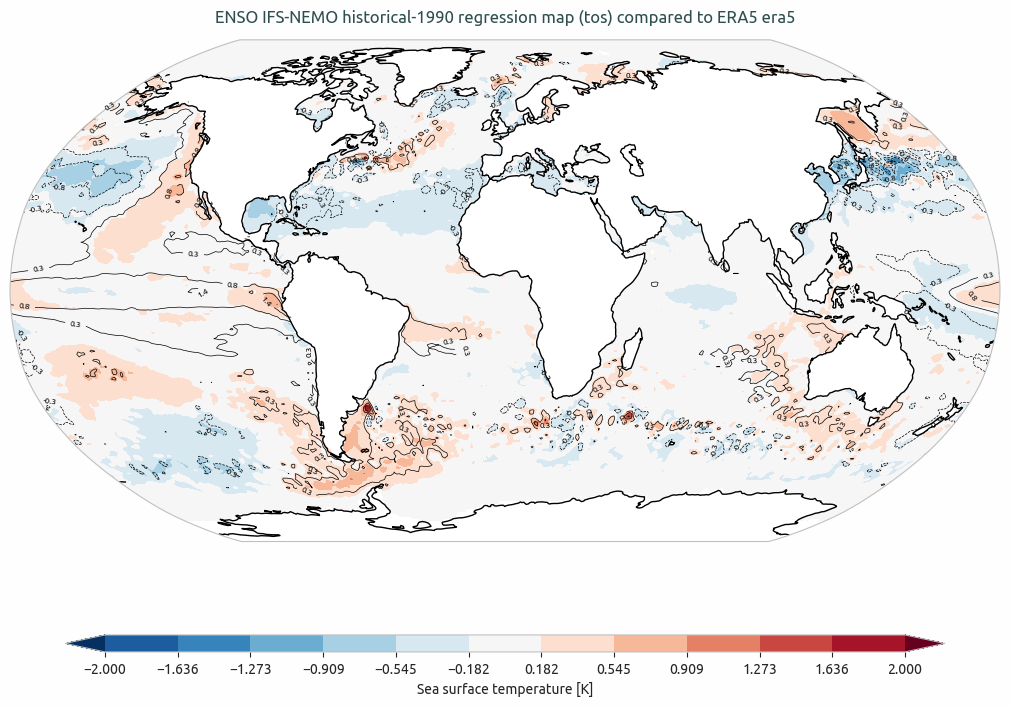

In [13]:
fig_reg = plt.plot_maps(maps=[reg_data], ref_maps=[reg_obs], statistic='regression')
description = plt.set_map_description(maps=[reg_data], ref_maps=[reg_obs], statistic='regression')
plt.save_plot(fig_reg, diagnostic_product='regression', metadata={'description': description})